In [31]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [32]:
import pathlib 
import os
import  shutil

dir_path= pathlib.Path.cwd()
print(dir_path)
def read_file():
    dir_folder= pathlib.Path.cwd().parent
    input_path = dir_folder/ "data" / "diabetes"
    file_name = "diabetes.csv"
    df= pd.read_csv(os.path.join(input_path,file_name))
    return df

df = read_file()


c:\Abdelouaheb\perso\Ph\machine_learning_pipeline\diabetes


In [33]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())


##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [34]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [35]:
# Balanced or Unbalanced data 
round(df["Outcome"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

Outcome
0    65%
1    35%
Name: count, dtype: object

In [36]:
# univarie analysis 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


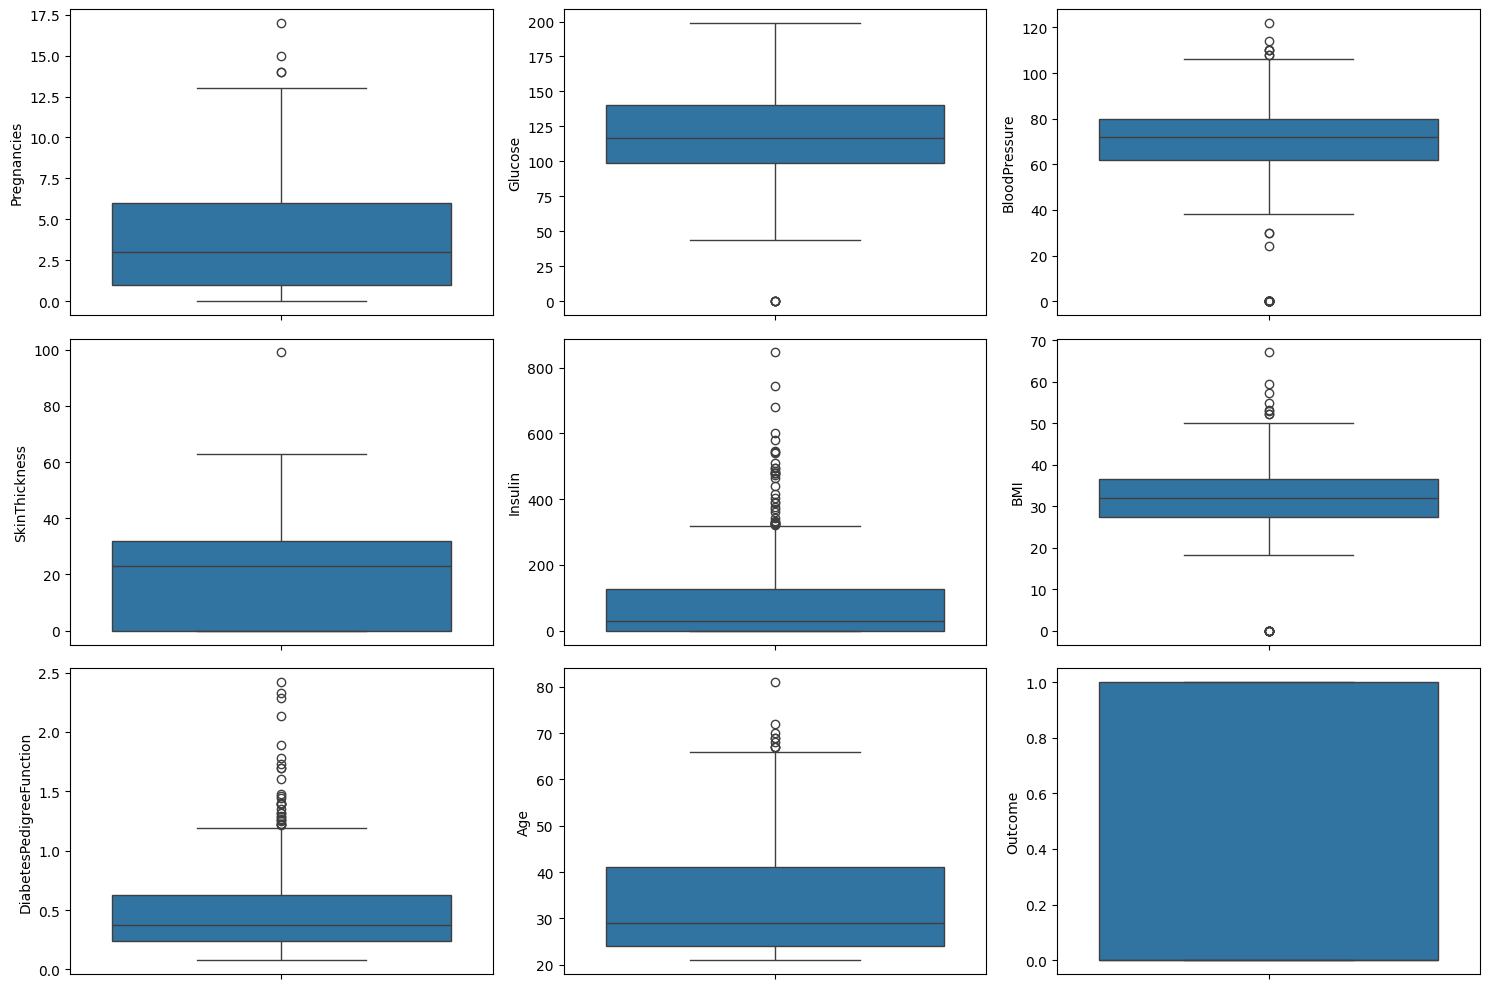

In [37]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()


In [38]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [39]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

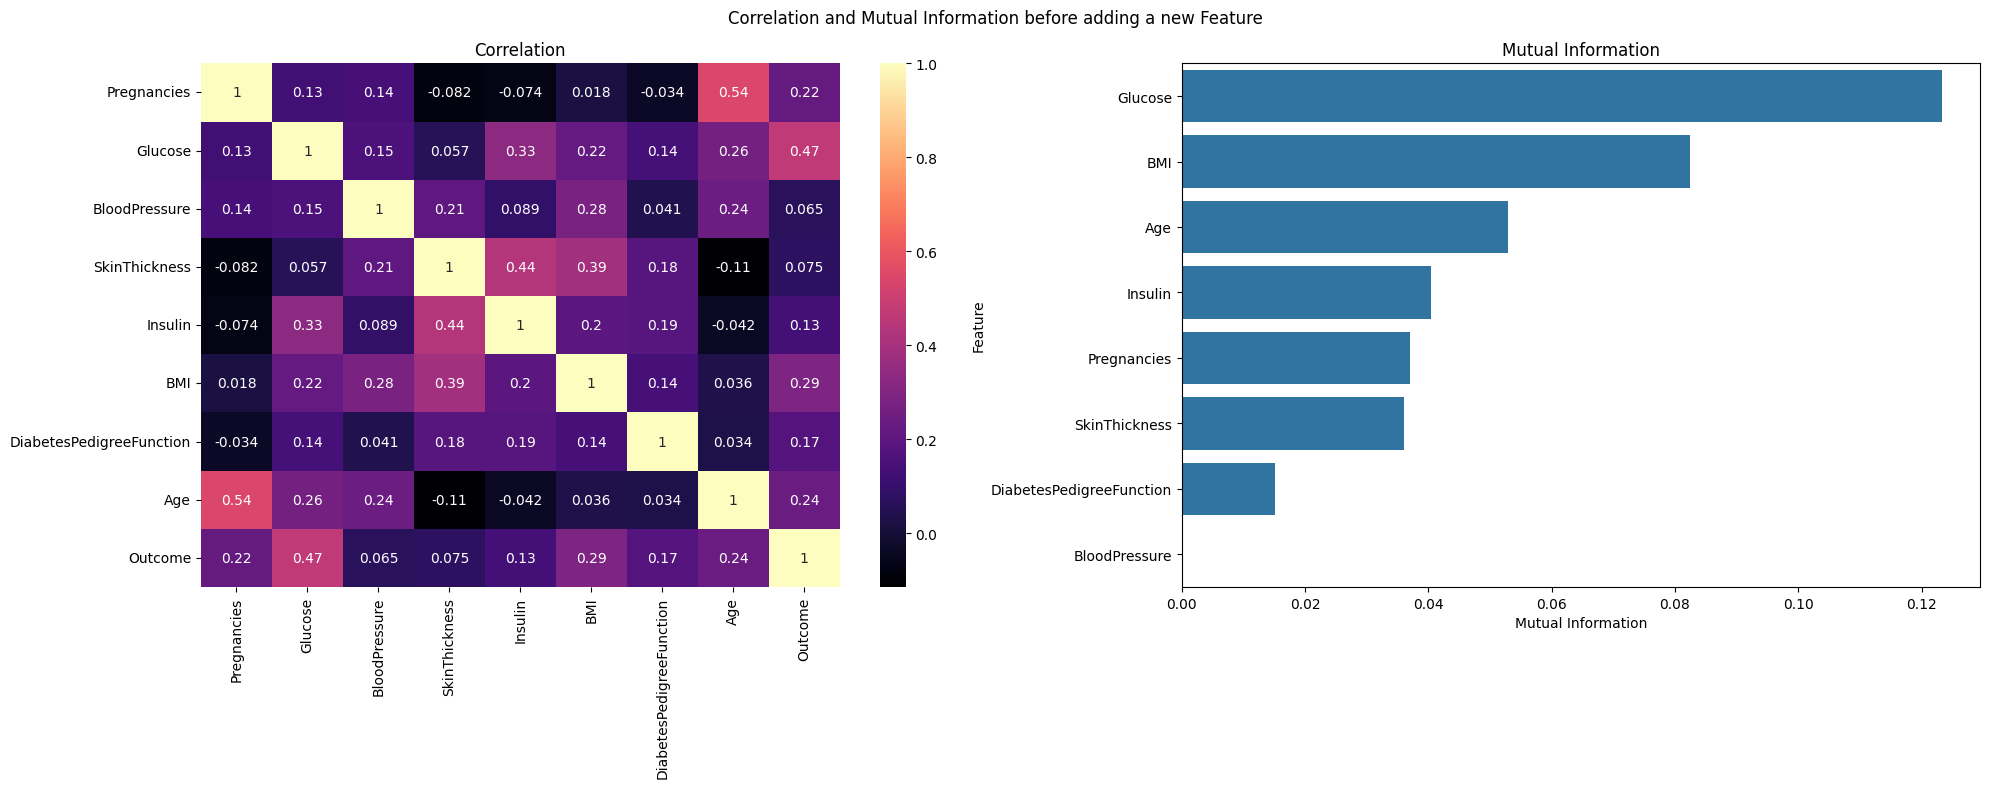

In [40]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

In [41]:
max = df['Age'].max()
min = df['Age'].min()
print(max,min)

81 21


In [42]:
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
#on = OrdinalEncoder()

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

In [43]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Category,Normalized_Age
0,6,148,72,35,0,33.6,0.627,50,1,0,0.483333
1,1,85,66,29,0,26.6,0.351,31,0,3,0.166667
2,8,183,64,0,0,23.3,0.672,32,1,3,0.183333
3,1,89,66,23,94,28.1,0.167,21,0,3,0.000000
4,0,137,40,35,168,43.1,2.288,33,1,3,0.200000
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0.700000
764,2,122,70,27,0,36.8,0.340,27,0,3,0.100000
765,5,121,72,23,112,26.2,0.245,30,0,3,0.150000
766,1,126,60,0,0,30.1,0.349,47,1,0,0.433333


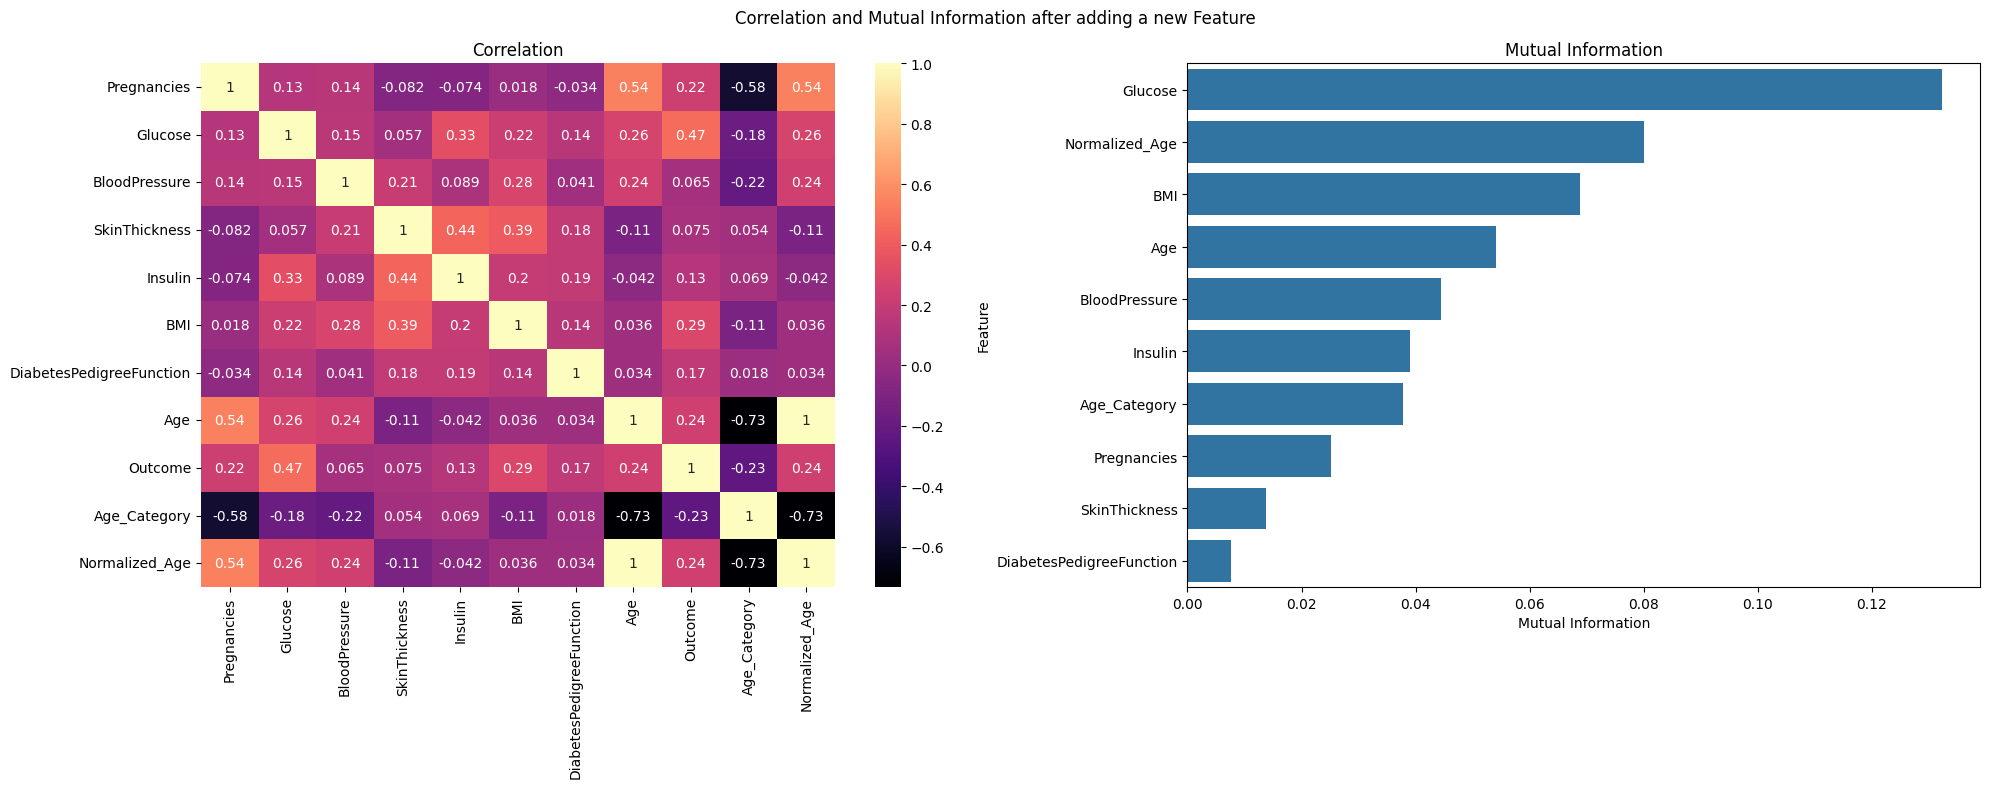

In [44]:
tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='Outcome')
y= df['Outcome']

In [54]:
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20, stratify=y)

In [57]:
#importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [79]:
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

In [62]:
scaler = MinMaxScaler()
scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion

X_train_scaler = scaler.fit_transform(x_t)
X_test_scaler = scaler.transform(x_te)

In [ ]:
lgc= LogisticRegression()
training_start = time.perf_counter()
# model=lgc.fit(x_t,y_t)
# with scaler
model=lgc.fit(X_train_scaler,y_t)
training_end = time.perf_counter()
prediction_start= time.perf_counter()
y_pred =model.predict(X_test_scaler)
y_pred_proba = model.predict_proba(x_te)
prediction_end= time.perf_counter()
#acc_Lgc= round(lgc.score(x_t,y_t)* 100, 2)
acc_Lgc_train = model.score(X_train_scaler,y_t)
acc_Lgc_test = model.score(X_test_scaler, y_te)
Lgc_train_time = training_end-training_start
Lgc_prediction_time = prediction_end-prediction_start
#print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy is: %3.2f" % (acc_Lgc))
print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Train set is: %3.2f" %(acc_Lgc_train)+ "%")
print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Test set is: %3.2f" %(acc_Lgc_test)+ "%")
print("Time consumed for training: %4.3f seconds" % (Lgc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (Lgc_prediction_time))


Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Train set is: 0.75%
Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Test set is: 0.79%
Time consumed for training: 0.003 seconds
Time consumed for prediction: 0.00210 seconds


In [76]:
reg=LogisticRegression(max_iter=10000)
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
#nreg.fit(x_t,y_t)
nreg.fit(X_train_scaler,y_t)
print(nreg.best_params_)
print(nreg.best_score_)

{'solver': 'saga', 'penalty': 'l1', 'C': 8}
0.7692075015124016


In [77]:
nreg=nreg.best_estimator_
predt1=nreg.predict(X_train_scaler)
pred1=nreg.predict(X_test_scaler)

In [80]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

In [81]:
acc

[0.7916666666666666]